### Ay 119 Deep Learning Exercises

Matthew Graham, 2025

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import h5py
import gzip
import io

The data for these exercises consist of 10,000 thumbnails (64 x 64 x 3) from SDSS of four different types of galaxy: smooth round, smooth cigar, edge on disk, and unbarred spiral. They have already been divided up into a training data set of 8,000 and a test data set of 2,000. They can be downloaded from:

  * http://astro.caltech.edu/~mjg/train_dataset.hdf5.gz
  * http://astro.caltech.edu/~mjg/test_dataset.hdf5.gz
  * http://astro.caltech.edu/~mjg/galaxy_mnist_train_catalog.parquet
  * http://astro.caltech.edu/~mjg/galaxy_mnist_test_catalog.parquet

We define our four classes:

In [2]:
classes = ['smooth_round', 'smooth_cigar', 'edge_on_disk', 'unbarred_spiral']

The catalogs are in Parquet format which it is straightforward enough to deal with via Pandas:

In [3]:
# Path to your parquet catalog file
catalog = pd.read_parquet("/Users/mjg/Projects/packages/galaxy_mnist/data/galaxy_mnist_train_catalog.parquet")

The labels/targets are given by:

In [4]:
y = catalog['label'].to_numpy(dtype = np.uint8)

and the images are can be read into a Numpy array via:

In [5]:
# Path to your gzipped HDF5 file
filename = '/Users/mjg/Projects/packages/galaxy_mnist/data/train_dataset.hdf5.gz'

# Open and read the gzip file into memory
with gzip.open(filename, 'rb') as f:
    decompressed_data = f.read()

# Use BytesIO to treat it as a file object for h5py
with h5py.File(io.BytesIO(decompressed_data), 'r') as h5f:
    a_group_key = list(h5f.keys())[0]
    X = h5f[a_group_key][()]  

Check data shape:

In [6]:
X.shape

(8000, 64, 64, 3)

Note that if you are working with PyTorch, you will need to transpose this to (8000, 3, 64, 64). In either case, do not forget to normalize the values (hint: the maximum value in any pixel is 255).

Here's a plot of the first 5 images in each class just to make sure everything looks OK:

In [8]:
def plot_image(image_tensor, ax=None):
    if ax is None:
        ax = plt.gca()
    # convert to numpy array
    image = np.array(image_tensor)
    # move the RGB axis to the end
    image = np.moveaxis(image, 0, -1)
    # plot on the given axis object
    ax.imshow(image)

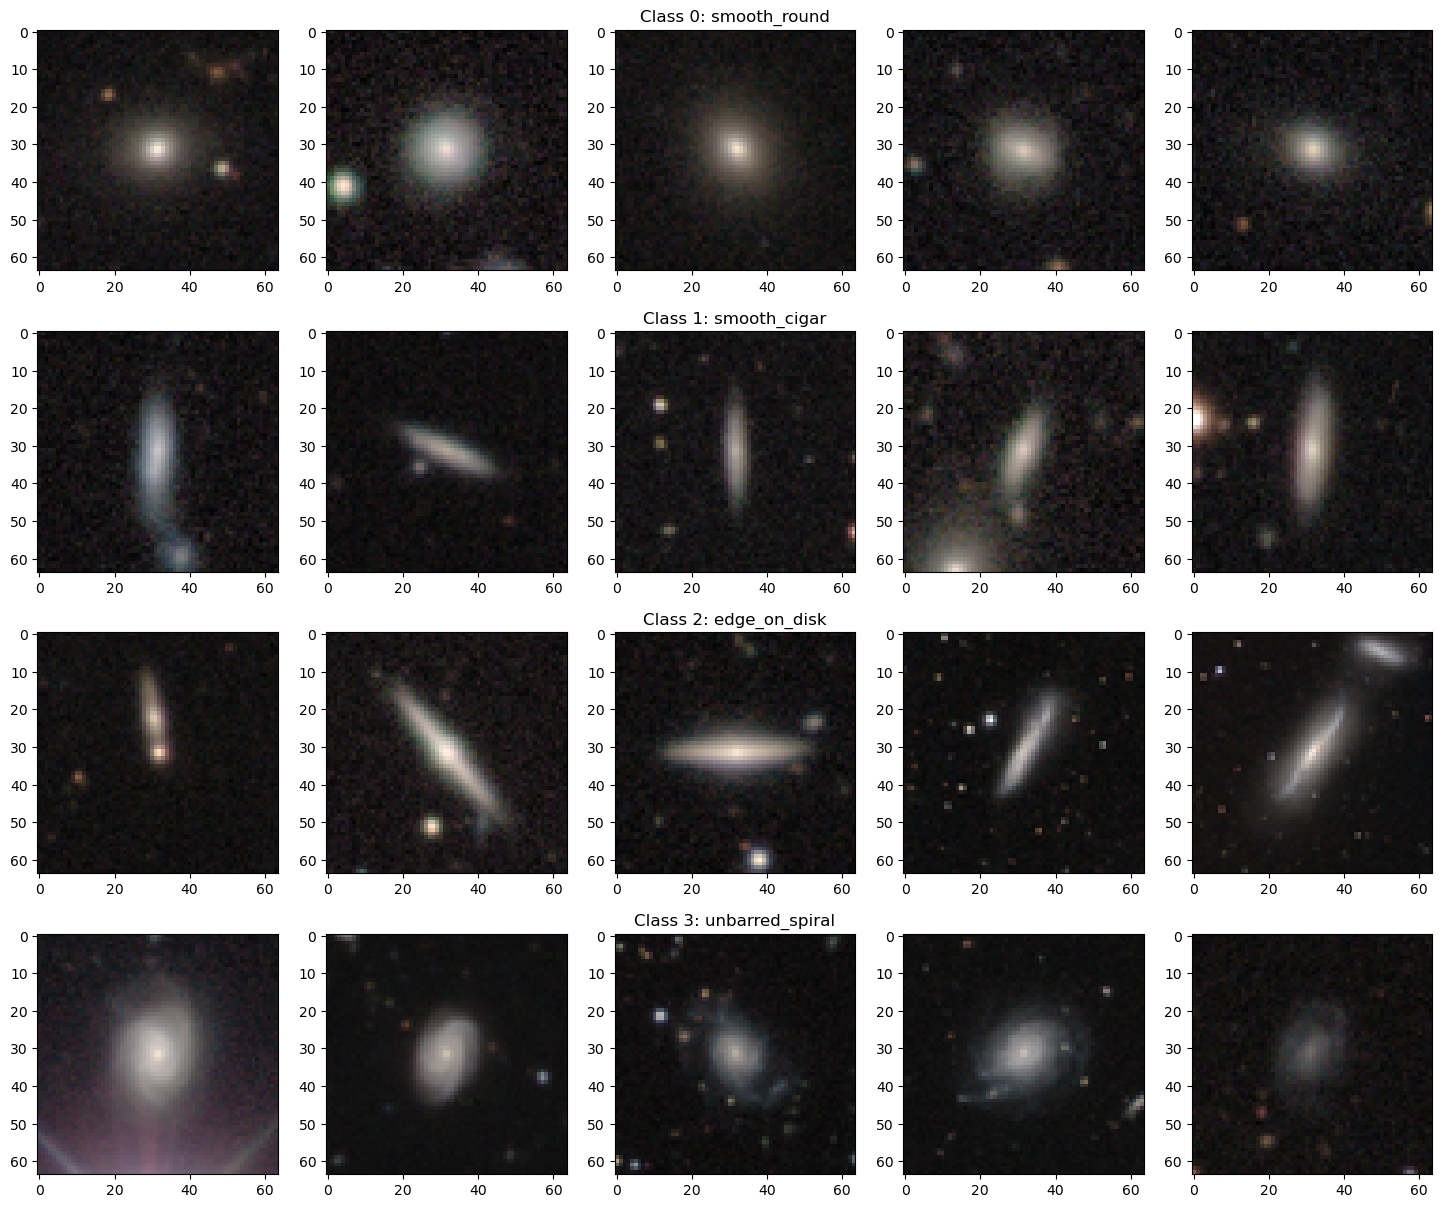

In [9]:
fig = plt.figure(figsize=(18, 15))
# use gridsped for creating subplots
gs = GridSpec(4, 5)

for i in range(4):
    # get images for the class
    idx = y == i
    images_idx = X[idx]
    for j in range(5):
        # plot the first 5 images for each class
        ax = fig.add_subplot(gs[i, j])
        plot_image(images_idx[j], ax=ax)
        # place a title for each row
        if j == 2:
            ax.set_title(f'Class {i}: {classes[i]}')

Remember to also load the test data catalog and images:

### Exercise 1: 

Write and train a fully connected network (MLP) with 3 hidden layers, each with 512 nodes.

Remember to use some fraction of the training data set for validation - the test data set is only to be used after training to assess the accuracy of the network. If you are using PyTorch for implementation then you probably have to load the data into PyTorch tensors with the correct data type. 

Use sparse categorical cross entropy for loss function, a learning rate of 0.0015, and train for 50 epochs:

Plot the training loss and the validation loss as a function of training epoch:

Evaluate the accuracy of the model on the test data set:

Produce a confusion matrix for the model.

### Exercise 2:

Let's try a convolutional neural network instead - write a 3 layer CNN with 32 features in the first layer, 64 in the second and 128 in the final layer and then a fully connected layer for classification:

Run it for 50 epochs and assess the accuracy on the test data set and produce a confusion matrix.

Note: this tests whether you read all the instructions before starting. You probably want to use Dropout layers in your neural networks with a dropout rate of 0.2.

### Optional:

See if you can improve on either the MLP or CNN accuracy with more layers, nodes, training epochs, learning rates.

Investigate whether there are any common properties to the galaxies that are misclassified.
